## 20200923-181126-network-RMSprop

In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.data_preprocess as preprocess
from utils.model_metrics import ModelMetric
from utils.mode_figure import ModelFigre
import datetime
from utils.model_callback import step_decay, exp_decay, MyStopTrainCallBack
import utils.network.best as model

In [2]:
modelmetric = ModelMetric()

In [3]:
net = model.BestLstmModel()

In [4]:
# algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, clipvalue=0.3, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
algorithm = tf.keras.optimizers.SGD(learning_rate=0.0199, momentum=0.99, clipvalue=0.3, decay= 1e-06, nesterov=True, name='SGD')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=modelmetric.metric('binary_crossentropy')) # categorical_crossentropy

In [5]:
from tensorflow.keras import callbacks
dir_name = datetime.datetime.now().strftime("Best-%Y%m%d-%H%M%S-SGD")

logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
lrate = callbacks.LearningRateScheduler(step_decay)
csv_log = tf.keras.callbacks.CSVLogger('../model_record/'+dir_name+"/log", separator=',', append=False)
if not os.path.isdir('../model_record/'+dir_name):
    os.mkdir('../model_record/'+dir_name)
# stop_train = MyStopTrainCallBack()
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [6]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [7]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log, lrate], verbose=1) # lrate

.9987 - binary_accuracy: 0.9844 - binary_crossentropy: 0.0430 - val_loss: 0.0418 - val_tp: 143297.0000 - val_fp: 2171.0000 - val_tn: 143297.0000 - val_fn: 2171.0000 - val_acc: 0.0000e+00 - val_precision: 0.9851 - val_recall: 0.9851 - val_auc: 0.9989 - val_binary_accuracy: 0.9851 - val_binary_crossentropy: 0.0418 - lr: 0.0016
Epoch 65/100
663/663 [==============================] - 16s 24ms/step - loss: 0.0429 - tp: 334139.0000 - fp: 5285.0000 - tn: 334139.0000 - fn: 5285.0000 - acc: 1.4731e-06 - precision: 0.9844 - recall: 0.9844 - auc: 0.9987 - binary_accuracy: 0.9844 - binary_crossentropy: 0.0429 - val_loss: 0.0416 - val_tp: 143315.0000 - val_fp: 2153.0000 - val_tn: 143315.0000 - val_fn: 2153.0000 - val_acc: 0.0000e+00 - val_precision: 0.9852 - val_recall: 0.9852 - val_auc: 0.9988 - val_binary_accuracy: 0.9852 - val_binary_crossentropy: 0.0416 - lr: 0.0016
Epoch 66/100
663/663 [==============================] - 15s 22ms/step - loss: 0.0428 - tp: 334152.0000 - fp: 5272.0000 - tn: 33415

In [8]:
results  = net.evaluate(X_test, y_test, verbose=1)
modelmetric.getTrainMetricValue(net, results)

6495/6495 [==============================] - 59s 9ms/step - loss: 0.0424 - tp: 204680.0000 - fp: 3131.0000 - tn: 204680.0000 - fn: 3131.0000 - acc: 0.0000e+00 - precision: 0.9849 - recall: 0.9849 - auc: 0.9988 - binary_accuracy: 0.9849 - binary_crossentropy: 0.0424
loss :  0.04237605631351471
tp :  204680.0
fp :  3131.0
tn :  204680.0
fn :  3131.0
acc :  0.0
precision :  0.9849334359169006
recall :  0.9849334359169006
auc :  0.9987533688545227
binary_accuracy :  0.9849334359169006
binary_crossentropy :  0.04237605631351471


In [9]:
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
modelmetric.confusion_matrix(y_label, y_class)
modelmetric.eva_metric(y_label, y_class)

TrueNegatives result:  129073.0
TruePositives result:  75607.0
FalseNegatives result:  153.0
FalsePositives result:  2978.0
Recall result:  0.9979805
Precision result:  0.96210474


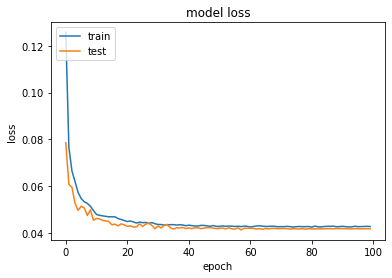

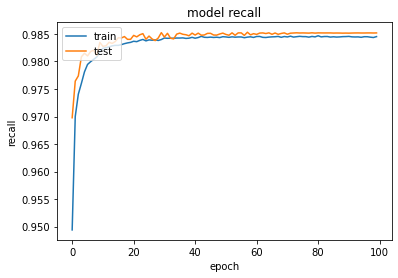

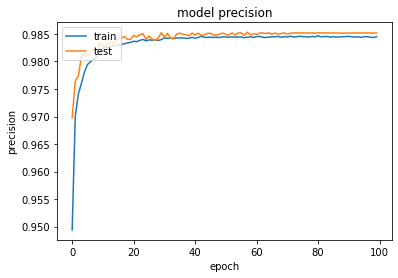

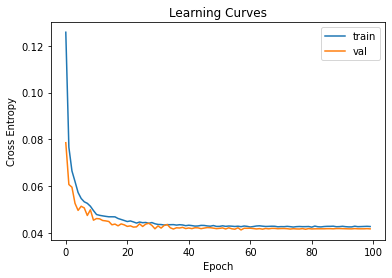

In [10]:
mf = ModelFigre("../model_record", dir_name, model_)
mf.loss_graph()
mf.recall_graph()
mf.precision_graph()
mf.cross_entropy_graph()
# fig.save_model(net,dir_name)

In [11]:
# net.save_weights('../model_record/'+dir_name+'/model/model.weight')

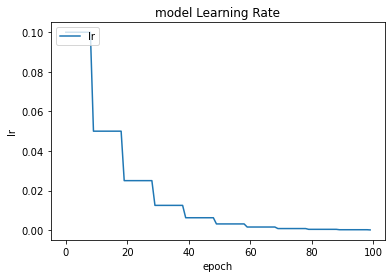

In [12]:
mf.lr_graph()

In [15]:
net.save_weights('../model_record/'+dir_name+'/model/model.h5')